# 0. Demonstration on how to use MultiCaRe dataset
Demonstrates how to load and explore the MultiCaRe dataset.Notebook adapted from the MultiCaRe GitHub repository. Illustrates how to load and perform an initial exploration of the MultiCaRe dataset.

In [1]:
%%capture
!pip install multiversity

from multiversity.multicare_dataset import MedicalDatasetCreator

In [2]:
import os
import pandas as pd

# 1. Downloading the Whole MultiCaRe Dataset

In [7]:
os.chdir("/home/onyxia/projet_NLP")
os.getcwd()

'/home/onyxia/projet_NLP'

In [8]:
mdc = MedicalDatasetCreator(directory = 'medical_datasets')

The MultiCaRe Dataset is already downloaded.
Importing and pre-processing the main files.
Done!


In [9]:
sorted(os.listdir('medical_datasets/whole_multicare_dataset'))

['PMC1',
 'PMC2',
 'PMC3',
 'PMC4',
 'PMC5',
 'PMC6',
 'PMC7',
 'PMC8',
 'PMC9',
 'abstracts.parquet',
 'captions_and_labels.csv',
 'case_images.parquet',
 'cases.parquet',
 'data_dictionary.csv',
 'metadata.parquet']

# 2. Reading of dataset

In [10]:
data_dictionary = pd.read_csv('medical_datasets/whole_multicare_dataset/data_dictionary.csv')

data_dictionary.head()

,file,field,explanation
0,captions_and_labels.csv,file_id,Primary key for each row. Each row contains on...
1,captions_and_labels.csv,file,Name of the image file. The file path can be d...
2,captions_and_labels.csv,main_image,Id from the original image (it corresponds to ...
3,captions_and_labels.csv,image_component,It is 'undivided' if the source image was not ...
4,captions_and_labels.csv,patient_id,"Id of the patient, created combining the PMC o..."


In [11]:
filters = [{'field': 'min_age', 'string_list': ['18']},
           {'field': 'gender', 'string_list': ['Male']},
           {'field': 'case_strings', 'string_list': ['tumor', 'cancer', 'carcinoma'], 'operator': 'any'},
           {'field': 'caption', 'string_list': ['metastasis', 'tumor', 'mass'], 'operator': 'any'},
           {'field': 'label', 'string_list': ['mri', 'head']}]

In [12]:
mdc.create_dataset(dataset_name = 'male_brain_tumor_dataset', filter_list = filters, dataset_type = 'multimodal')


The male_brain_tumor_dataset was successfully created!


**Case PMC10018421_01:**

'Gender: Male'

'Age: 32.0'

'Clinical Case:'

"A 32-year-old male presented with a history of intermittent headache for 5 months followed by progressive gait disturbances and blurry vision. His medical and family history was insignificant. His physical examination showed ataxia and cerebellar signs including dysmetria and dysdiadochokinesia in the right upper and lower limbs. Decreased visual acuity was noted in both eyes with bilateral papilledema on ophthalmologic exam. The rest of the examination was otherwise normal. Brain MRI revealed a lesion in the right cerebellar hemisphere. The patient underwent a suboccipital craniotomy. During the procedure, frozen sections were misinterpreted as high-grade malignant glioma. The neurosurgeon decided to proceed with subtotal resection because the risks of gross total resection (GTR) outweighed the benefits considering the aggressive nature of the suspected tumor. Adjuvant therapy with a combination of radiotherapy and chemotherapy with temozolomide was initiated. Two years after surgery

**Image:**

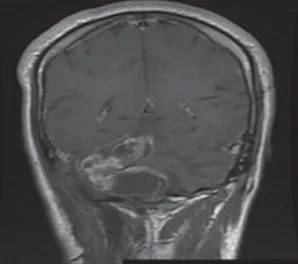

**Image Labels:**

['radiology', 't1', 'head', 'mri', 'mass', 'contrast', 'spin_echo', 'head', 'radiology', 'sagittal', 'mri']

**Image Caption:**

Mixed cystic-solid pattern of PXA. MR images show multiple cystic lesions and solid masses located in the right cerebellar hemisphere. B; Coronal view T1-weighted with contrast.

**Citation Information:**

{'pmcid': 'PMC10018421',
 'doi': '10.1159/000529741',
 'pmid': '36938309',
 'title': 'A Recurrent Pleomorphic Xanthoastrocytoma in the Cerebellum in a Young Adult: A Case Report and Review of the Literature',
 'year': '2023',
 'authors': ['Ruba Aljendi',
  'Mohammed Amr Knifaty',
  'Mohammed Amin',
  'Souliman Diab',
  'Muhammad Saleh Ali',
  'Zuheir Alshehabi'],
 'journal': 'Case Rep Neurol',
 'journal_detail': '2023 Feb 17;15(1):54-62.',
 'link': 'https://pubmed.ncbi.nlm.nih.gov/36938309/',
 'license': 'CC BY-NC'}

In [13]:
mdc.display_example(1)

In [20]:
mdc.case_df

,case_id,pmcid,gender,age,case_text
0,PMC6381877_01,PMC6381877,Male,60.0,A 60-year-old male smoker presented with persi...
1,PMC5287946_01,PMC5287946,Male,30.0,A 30-year-old man came to Peking Union Medical...
2,PMC8200619_01,PMC8200619,Male,67.0,"A totally bimaxillary edentulous male patient,..."
3,PMC5987309_01,PMC5987309,Male,72.0,A 72-year-old male with a past medical history...
4,PMC5337835_01,PMC5337835,Male,61.0,The patient is a 61-year-old male with end sta...
...,...,...,...,...,...
9829,PMC11792598_01,PMC11792598,Male,77.0,A 77-year-old man was referred to our hospital...
9830,PMC11818688_02,PMC11818688,Male,59.0,A 59-year-old male presented with a five-day h...
9831,PMC11818688_03,PMC11818688,Male,44.0,A 44-year-old male with a history that include...
9832,PMC11740585_01,PMC11740585,Male,45.0,A 45-year-old male was admitted to the First A...
